### Importing the Dataset

In [1]:
import numpy as np
import pandas as pd

posts = pd.read_csv("../data/Suicide_Detection.csv")
posts.drop(["Unnamed: 0"], axis=1, inplace=True)
posts[["class"]] = (posts[["class"]] == "suicide").astype("int16")

### Exploring the Dataset

In [2]:
posts.head()

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,1
1,Am I weird I don't get affected by compliments...,0
2,Finally 2020 is almost over... So I can never ...,0
3,i need helpjust help me im crying so hard,1
4,"I’m so lostHello, my name is Adam (16) and I’v...",1


In [3]:
posts.describe()

,class
count,232074.000000
mean,0.500000
std,0.500001
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


### Splitting the Dataset

In [4]:
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(posts, test_size=0.1, random_state=42)

#### Analyzing the Dataset

In [5]:
posts = strat_train_set.copy()
posts.head()

,text,class
186835,I don’t want to deal with this anymoreThere is...,1
216937,Bf thinks I am cheatingToday instead of waking...,1
176846,I hate myself...and I'm beginning to think eve...,1
49653,confession time s1eo5 about 9 years ago i stuc...,0
69140,"After years of contemplation, I'm ready.**This...",1


In [6]:
post_lengths = [len(post.split()) for post in posts["text"] if len(post.split()) < 1500]

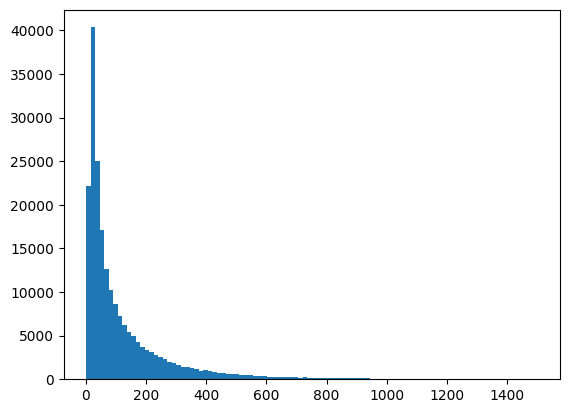

In [7]:
import matplotlib.pyplot as plt

plt.hist(post_lengths, bins=100)
plt.show()

### Preprocessing

#### Creating validation data

In [8]:
strat_train_set, strat_val_set = train_test_split(posts, test_size=1/9, random_state=1)

strat_train_set[:5]

,text,class
185289,Need some advice I’d appreciate if people won’...,0
135507,"Dear Magic Eye Bot I hate you,\nI never wanna ...",0
213617,If there's any teachers in this sub Why do you...,0
137338,I am now officially closer to 30 years of age ...,0
20632,Sure the royal family racism thing is interest...,0


#### Tokenizing the posts

In [9]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
spacy.require_gpu()
nlp.pipe_names

['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer']

In [10]:
doc = nlp('I was reading the paper.')
print([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])

['read', 'paper']


In [11]:
import pickle
# from alive_progress import alive_it

def preprocess_set(set, directory):
    print(f'Preprocessing {directory} data')

    texts = set.copy()['text']
    labels = set.copy()['class']
    texts = [' '.join(text.split()[:500]) for text in texts]

    docs = (doc for doc in (nlp.pipe(texts)))
    processed_texts = []

    for doc in docs:
        lemmas = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
        processed_texts.append(' '.join(lemmas))

    # for doc in alive_it(docs, total=len(texts)):
    #     lemmas = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    #     processed_texts.append(' '.join(lemmas))
    
    labels = np.array(labels)

    from pathlib import Path
    Path(f"{directory}").mkdir(parents=True, exist_ok=True)

    with open(f"{directory}/texts.pkl", "wb") as fp:
        pickle.dump(processed_texts, fp)
    
    with open(f"{directory}/labels.pkl", "wb") as fp:
        pickle.dump(labels, fp)

    return processed_texts, labels

In [12]:
len(strat_train_set)

185658

In [13]:
processed_texts, labels = preprocess_set(strat_train_set, 'train')
preprocess_set(strat_val_set, 'val')
preprocess_set(strat_test_set, 'test')

Preprocessing train data
Preprocessing val data
Preprocessing test data


(['know?7 month self harm free urge get strong strong day past day shit family stress especially nephew 12 mum custody tell kill numerous time wish easy partner family stress especially past day stress trigger want scream cry live near wood scream till possibly scream anymore cop probably call oh know depression know feel moment want come sure ok fucking annoying annoy time small stupid thing know go post',
  'start rich start company 16 afford big VAN TRIPS friend TIME LEFT start WORKING',
  'poem haiku u Game Dev hi hello hello stop fucking say hello know live',
  'honestly get idea anymore feel fake feel like backtalked annoying like hear brain speak hey heyy people fake not talk far thing help music s kinda stop work 2 fucking good friend deserve need suicidal fucktard help push away use barely useful life People love one fuck abuse think make difference father s actually fine family feel have suffer point hang anymore well not want feel guilty commit suicide hard help go to feel l